In [1]:
from plotnine import *
import os, gc, datetime, time
import pandas as pd, numpy as np
from tqdm import tqdm_notebook
import warnings
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8] # setting figure size
warnings.filterwarnings(action='ignore')
pd.set_option('max_columns', 500)
pd.set_option('max_rows', 500)

In [2]:
train_trans = pd.read_csv("/Users/jeong/downloads/IEEE/input/train_transaction.csv")
test_trans = pd.read_csv("/Users/jeong/downloads/IEEE/input/test_transaction.csv")

In [3]:
def change(hoge):
   return len(str(hoge).split('.')[1])
    
train_trans["TransactionAmt_decimal"] = train_trans["TransactionAmt"].map(change)

In [4]:
train_trans["TransactionAmt_decimal"].value_counts()

1     327950
2     200657
3      46098
15     12020
14      3503
16       311
13         1
Name: TransactionAmt_decimal, dtype: int64

In [5]:
ex = train_trans.groupby(["TransactionAmt_decimal"]).agg({'isFraud':['count','mean']}).reset_index()
ex.columns = ['amt','cnt','prop']
ex

,amt,cnt,prop
0,1,327950,0.034493
1,2,200657,0.010426
2,3,46098,0.118140
3,13,1,1.000000
4,14,3503,0.143591
5,15,12020,0.108652
6,16,311,0.009646


In [6]:
# 값이 적은 13, 14, 16은 제외
ex = train_trans[(train_trans["TransactionAmt_decimal"] != 13) & (train_trans["TransactionAmt_decimal"] != 14) & (train_trans["TransactionAmt_decimal"] != 16)]
ex["TransactionAmt_decimal_2"] = ex["TransactionAmt_decimal"].astype('str')


In [26]:
temp = ex.groupby(['card1']).size().nlargest(20).reset_index()
ex2 = ex[ex['card1'].isin(temp['card1'].values)]

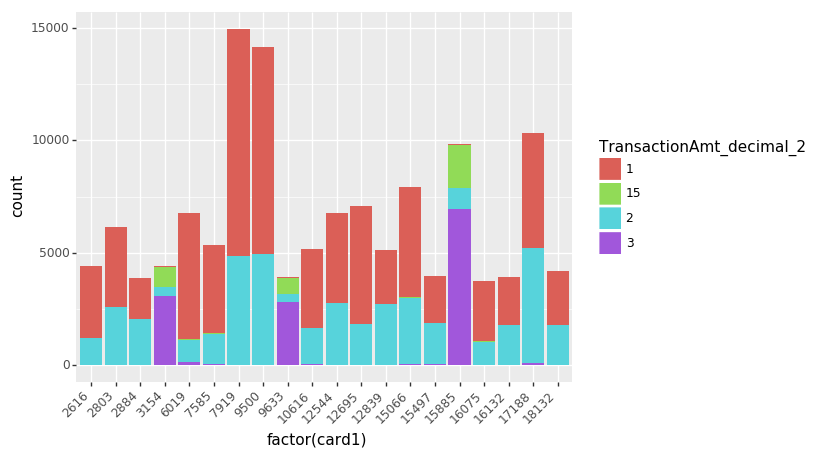

<ggplot: (-9223372029301637081)>

In [36]:
ggplot(ex2, aes('factor(card1)', fill = 'TransactionAmt_decimal_2')) + geom_bar()+ theme(axis_text_x  = element_text(angle = 45, hjust = 1))

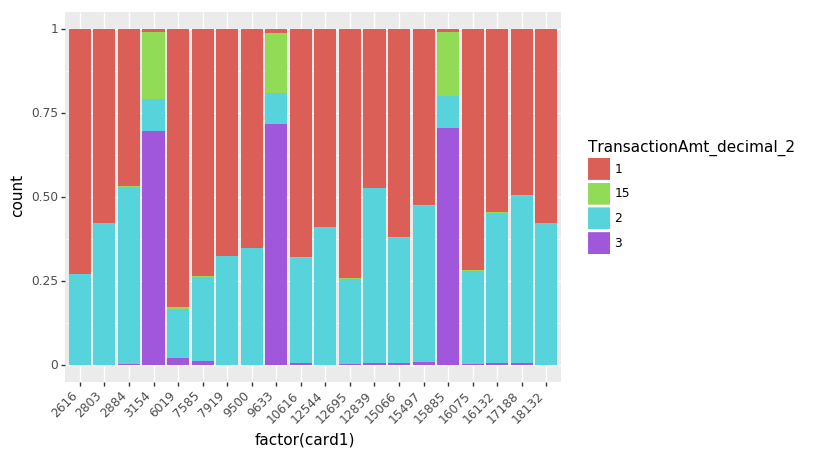

<ggplot: (7561797184)>

In [35]:
ggplot(ex2, aes('factor(card1)', fill = 'TransactionAmt_decimal_2')) + geom_bar(position = 'fill') + theme(axis_text_x  = element_text(angle = 45, hjust = 1))

In [41]:
temp = ex.groupby(['P_emaildomain']).size().nlargest(20).reset_index()
ex2 = ex[ex['P_emaildomain'].isin(temp['P_emaildomain'].values)]

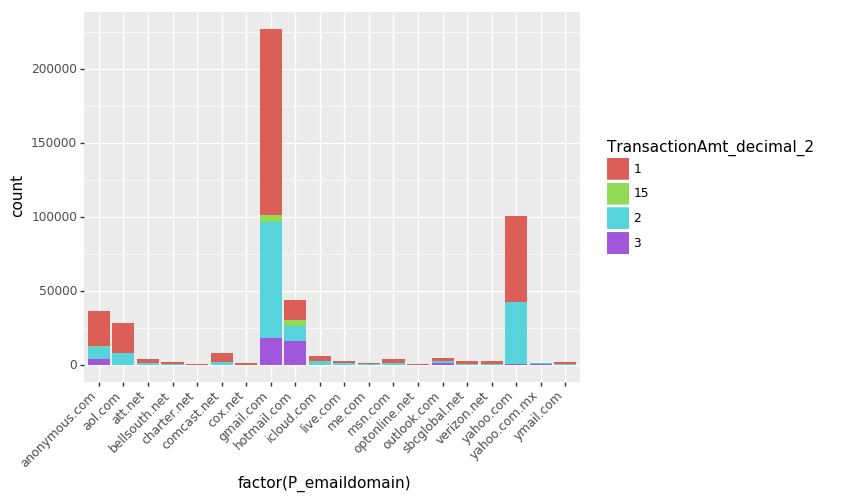

<ggplot: (-9223372029275564628)>

In [42]:
ggplot(ex2, aes('factor(P_emaildomain)', fill = 'TransactionAmt_decimal_2')) + geom_bar()+ theme(axis_text_x  = element_text(angle = 45, hjust = 1))

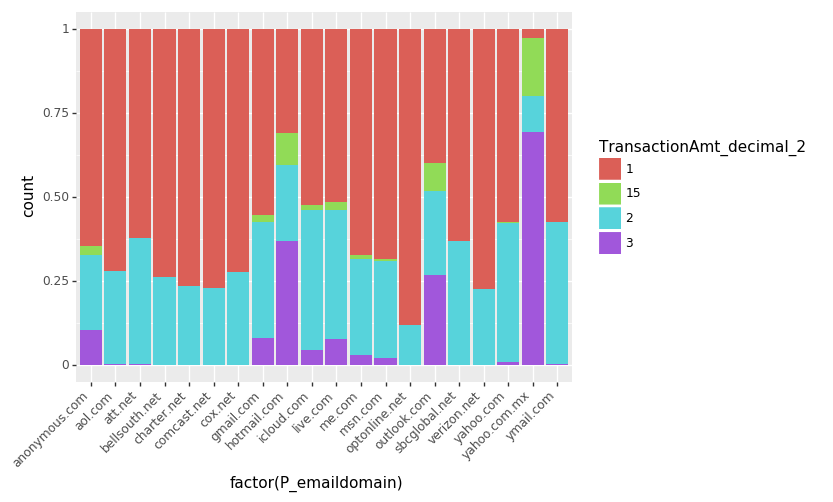

<ggplot: (-9223372029290022919)>

In [43]:
ggplot(ex2, aes('factor(P_emaildomain)', fill = 'TransactionAmt_decimal_2')) + geom_bar(position = 'fill')+ theme(axis_text_x  = element_text(angle = 45, hjust = 1))

In [52]:
def change(hoge):
   if hoge.notnull() :
      return len(str(hoge).split('.')[1])

In [53]:
for i in range(1,10):
    col = "V"+str(i)
    print(col)
    train_trans[col] = round(train_trans[col], -1)
    print(train_trans[col].head())
    train_trans[col+"_digit"] = train_trans[col].map(change)
    print(train_trans[col+"_digit"].value_counts())

V1
0    0.0
1    NaN
2    0.0
3    NaN
4    NaN
Name: V1, dtype: float64


AttributeError: 'float' object has no attribute 'notnull'

In [ ]:
def change(hoge):
   return len(str(hoge).split('.')[1])
  
train["TransactionAmt_decimal"] = train["TransactionAmt"].map(change)
test["TransactionAmt_decimal"] = test["TransactionAmt"].map(change)

train["TransactionAmt_decimal"] = str(train["TransactionAmt_decimal"])
test["TransactionAmt_decimal"] = str(test["TransactionAmt_decimal"])

train["TransactionAmt_decimal_card1"] = train["TransactionAmt_decimal"] + str(train["card1"])
test["TransactionAmt_decimal_card1"] = test["TransactionAmt_decimal"] + str(test["card1"])

train["TransactionAmt_decimal_P_emaildomain"] = train["TransactionAmt_decimal"] + str(train["P_emaildomain"])
test["TransactionAmt_decimal_P_emaildomain"] = test["TransactionAmt_decimal"] + str(test["P_emaildomain"])


# 'TransactionAmt_decimal', 'TransactionAmt_decimal_card1', 'TransactionAmt_decimal_P_emaildomain'